# Imports

In [1]:
import datasets
import matplotlib.pyplot as plt
import tqdm
import collections

# Dataset loading
First, load the HF wikitext dataset. The first run will involve a download, after which it will be cached.

In [2]:
dataset_group = 'wikitext'
dataset_name = 'wikitext-103-raw-v1'
dataset_split = 'train'
dataset_full_name = '/'.join([dataset_group, dataset_name, dataset_split])

dataset = datasets.load_dataset(dataset_group, name=dataset_name, split=dataset_split)

Found cached dataset wikitext (/home/tom/.cache/huggingface/datasets/wikitext/wikitext-103-raw-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126)


# Basic dataset information

In [3]:
num_records = len(dataset)
print(f'Number of records in {dataset_full_name}: {num_records}')

Number of records in wikitext/wikitext-103-raw-v1/train: 1801350


## Look at a few records

In [4]:
num_to_show = 10

for i in range(num_to_show):
    print(i, dataset[i]['text'])

0 
1  = Valkyria Chronicles III = 

2 
3  Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . 

4  The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving f

Looking at this we can see that the dataset is split at the section/subsection level, with headings occurring as separate records. From a language modelling point of view this doesn't seem ideal (earlier sections provide a lot of useful context, for instance) but let's roll with it for now. This won't be an issue for training a tokeniser, but is a useful thing to experiment with during training.

## Record length distribution

In [5]:
record_lengths = []
for record in tqdm.tqdm(dataset):
    record_lengths.append(len(record['text']))

100%|█████████████████████████████████████████████████████████████████████████████████████| 1801350/1801350 [00:08<00:00, 200277.60it/s]


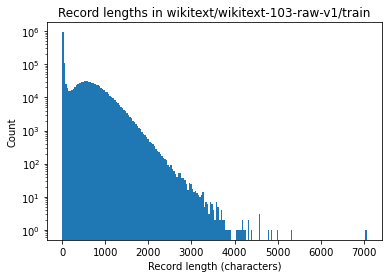

In [6]:
fig, axes = plt.subplots(1)
axes.hist(record_lengths, bins=200, log=True)
axes.set_xlabel('Record length (characters)')
axes.set_ylabel('Count')
axes.set_title(f'Record lengths in {dataset_full_name}')
plt.show()

## Number of characters & character count

In [7]:
chars = collections.defaultdict(int)  # initialises to zero

for record in tqdm.tqdm(dataset):
    for char in record['text']:
        chars[char] += 1

100%|██████████████████████████████████████████████████████████████████████████████████████| 1801350/1801350 [00:38<00:00, 46481.82it/s]


In [8]:
num_unique_chars = len(chars.keys())
print(f'Number of unique characters in {dataset_full_name}: {num_unique_chars}')

Number of unique characters in wikitext/wikitext-103-raw-v1/train: 4979


In [9]:
char_counts = [chars[k] for k in chars]

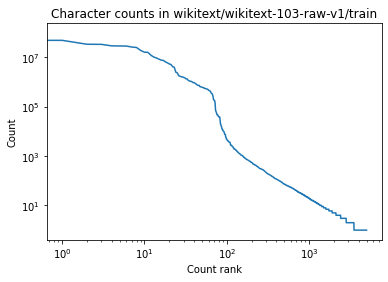

In [10]:
fig, axes = plt.subplots(1)
axes.plot(sorted(char_counts, reverse=True))
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel('Count rank')
axes.set_ylabel('Count')
axes.set_title(f'Character counts in {dataset_full_name}')
plt.show()

Characters clearly don't follow a Zipfian distribution overall, unlike words. Although the tail plausibly does follow a Zipf distribution, and the first ~100 characters may also do so, the parameters clearly differ between these cases and there's a sharp transition around rank 100.